In [65]:
from skeleton import VariationalAutoEncoder, EmojiDataset 
import torch
import torchvision
from torch.utils.data import DataLoader 
import matplotlib.pyplot as plt

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = VariationalAutoEncoder(6).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [4]:
checkpoint = torch.load("trained_models/vae_model_300.pth", map_location=device)

model.load_state_dict(checkpoint["model_state_dict"])

model.eval()
print("Loaded VAE successfully.")

Loaded VAE successfully.


In [5]:
print(model)

VariationalAutoEncoder(
  (fc_mu): Linear(in_features=128, out_features=6, bias=True)
  (fc_logvar): Linear(in_features=128, out_features=6, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=6, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=500, bias=True)
    (3): ReLU()
    (4): Linear(in_features=500, out_features=65536, bias=True)
    (5): Unflatten(dim=1, unflattened_size=(64, 32, 32))
    (6): ReLU()
    (7): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (8): ConvTranspose2d(32, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (9): Sigmoid()
  )
  (convolutions): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, pad

In [13]:
def sample_from_vae(model, num_samples=16):
    latent_dim = 6   # ensure your class exposes this

    with torch.no_grad():
        z = torch.randn(num_samples, latent_dim).to(device)
        samples = model.decoder(z)
    return samples

samples = sample_from_vae(model, num_samples=16)

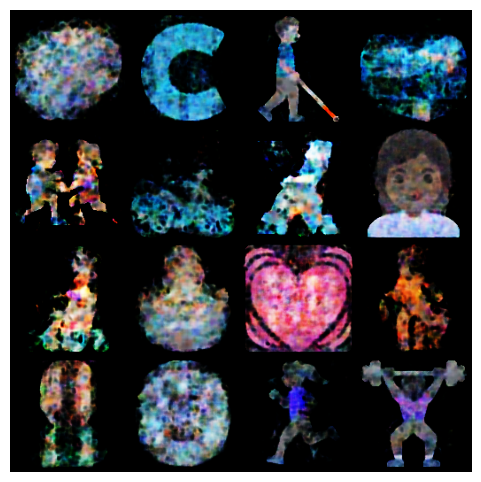

In [ ]:
grid = torchvision.utils.make_grid(samples, nrow=4)

plt.figure(figsize=(6, 6))
plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
plt.axis("off")
plt.show()

In [54]:
def interpolate(z1, z2, alpha = 0.4):
    return z1 + alpha * (z2-z1)

In [18]:
def show_image(img_tensor, title=None):
   
    img = img_tensor.detach().cpu()
    img = img.permute(1, 2, 0)
    img = img.numpy()

    img = img.clip(0, 1)

    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis("off")

    if title:
        plt.title(title)

    plt.show()

In [49]:
torch.manual_seed(100)

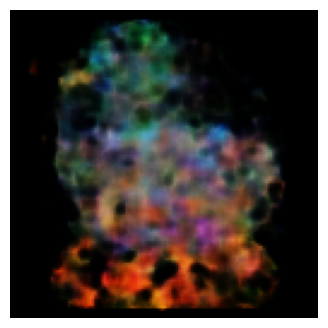

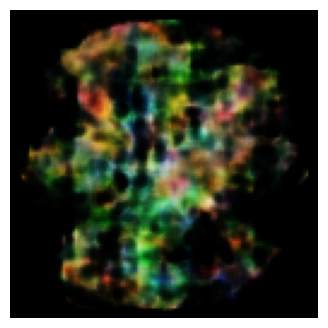

In [58]:
z1 = torch.randn(1, 6).to(device)
z2 = torch.randn(1,6).to(device)

x1_hat = model.decoder(z1) 
x2_hat = model.decoder(z2) 

show_image(x1_hat.view(3, 128,128))
show_image(x2_hat.view(3, 128,128))
# x1_hat.shape

# x1_hat_img = x1_hat.view(3,128,128).permute(1,2,0).cpu()
# x1_hat_img.shape

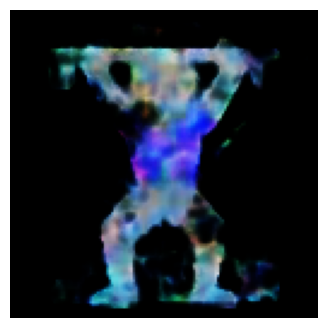

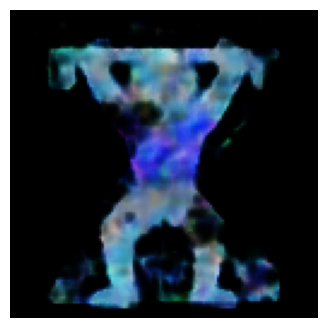

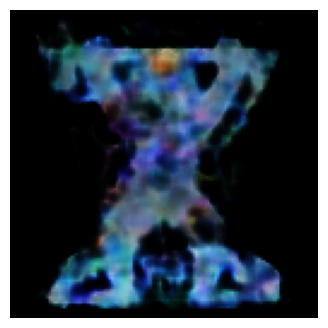

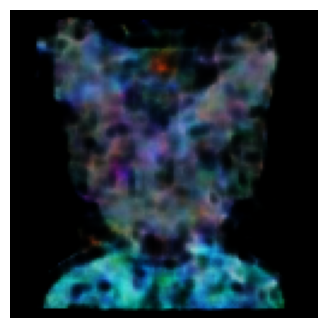

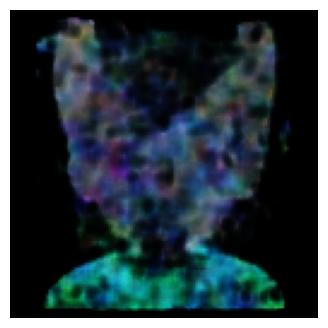

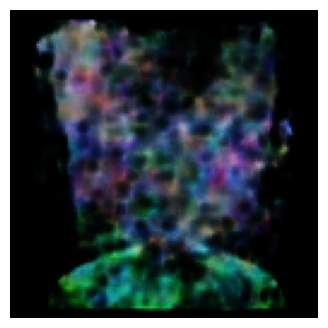

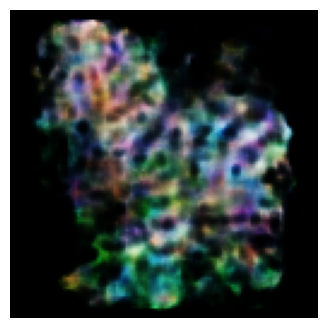

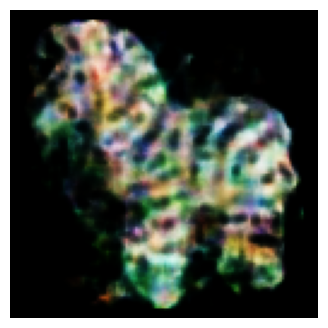

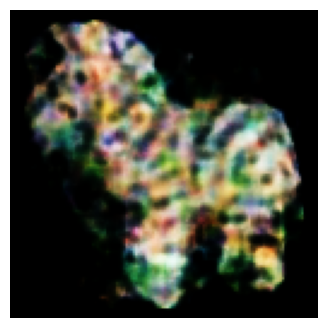

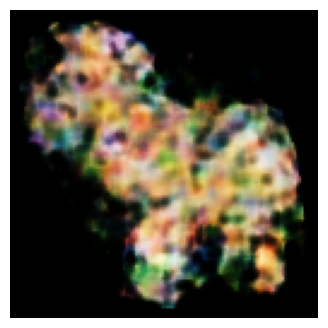

In [57]:
i = 0.1
while i <= 1.0:
    z_interp = interpolate(z1,z2,i)
    x_interp = model.decoder(z_interp).view(3,128,128)
    show_image(x_interp)
    i += 0.1


In [101]:
train_data = EmojiDataset("data/noto-128", small_sample=True)
loader = DataLoader(train_data, batch_size=32, shuffle=True)

TypeError: EmojiDataset.__init__() got an unexpected keyword argument 'small_sample'